In [1]:
import sys
sys.path.append('..')

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import autograd.numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from autograd import hessian, grad

from extremevalue.gpd import GPDMLE, GEVMLE
rng = np.random.default_rng()

In [2]:
n_sample = 100000
x_data = rng.normal(0.0 ,scale=1.0,size=n_sample)
# x_data = rng.standard_t(df=2.8,size=n_sample)

In [3]:
u = 2.0
x_exceed = x_data[np.where(x_data>u)]-u

In [4]:
xi, _, sigma = sp.stats.genpareto.fit(x_exceed,floc=0.0)
(xi,sigma)

(-0.08459971488747164, 0.41378806854984873)

In [5]:
gpddemo = GPDMLE(u)
gpddemo.fit(x_data)

In [6]:
gpddemo.get_params(include_ci=True)

({'xi': -0.08462948885334878, 'sigma': 0.4138076621315185},
 {'xi': (-0.12171112579487542, -0.047547851911822155),
  'sigma': (0.39056351958375746, 0.4370518046792795)})

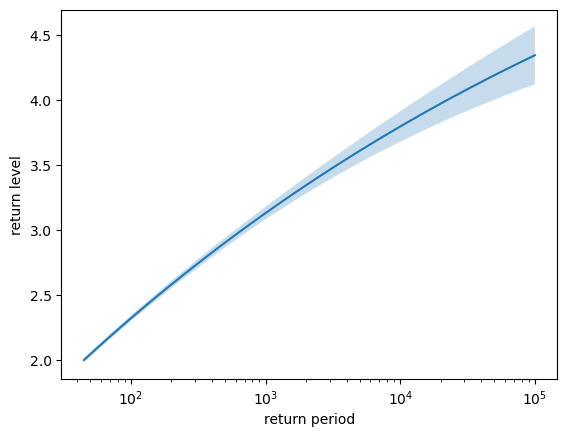

In [7]:
gpddemo.return_level_plot(include_ci=True)

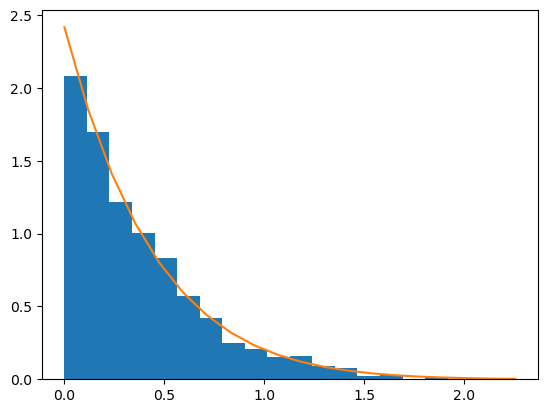

In [8]:
gpddemo.dist_plot()

In [9]:
def period_max(x,period=1):
    n_blocks = len(x)//period
    
    return np.max(np.array_split(x,n_blocks),axis=1)
    

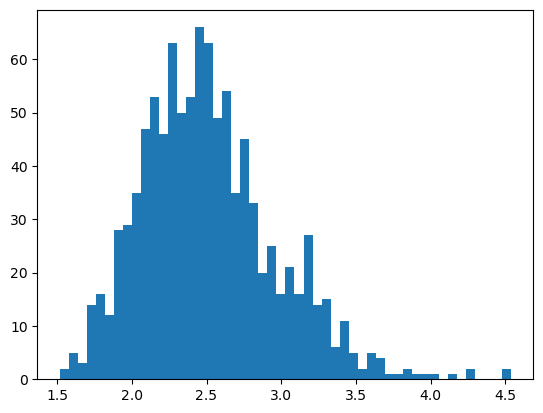

In [22]:
x_max = period_max(x_data,period=100)
plt.hist(x_max,50);

In [11]:
x_max = period_max(x_data,period=100)
xi, mu, sigma = sp.stats.genextreme.fit(x_max)
xi,  mu, sigma

(0.08068071825822792, 2.3178804769606565, 0.38668683045183583)

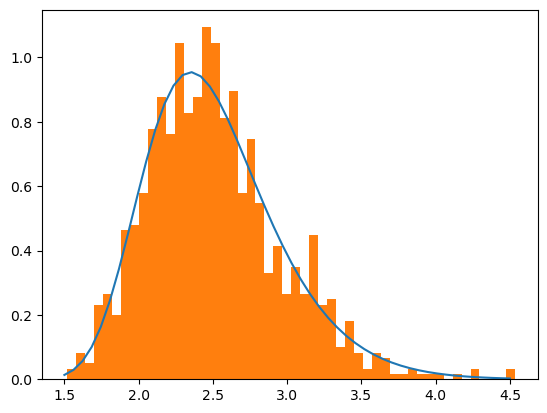

In [12]:
x_vals = np.linspace(1.5,4.5,50)
plt.plot(x_vals,sp.stats.genextreme.pdf(x_vals,xi,loc=mu,scale=sigma))
plt.hist(x_max,50,density=True);

In [13]:
rl = gpddemo._return_periods()
p_vals = 1.0/rl

In [14]:
gev = GEVMLE(period =100)
gev.fit(x_data)
gev.get_params(include_ci=True)

({'mu': 2.3178804769606565,
  'sigma': 0.38668683045183583,
  'xi': -0.08068071825822792},
 {'mu': (2.290802615858042, 2.344958338063271),
  'sigma': (0.36759756575171704, 0.4057760951519546),
  'xi': (-0.12023840108951472, -0.04112303542694113)})

In [15]:
x_rp = 400.0
gev.return_level(x_rp), gev.return_level_se(x_rp), gev.return_level_se(x_rp)/gev.return_level(x_rp)

(4.154731835929319, array(0.09241051), 0.02224223331675689)

In [16]:
x_rl = 2.5
gev.return_period(x_rl), gev.return_period_se(x_rl), gev.return_period_se(x_rl)/gev.return_period(x_rl) 

(2.167557375578973, array(0.06337499), 0.029237973635430004)

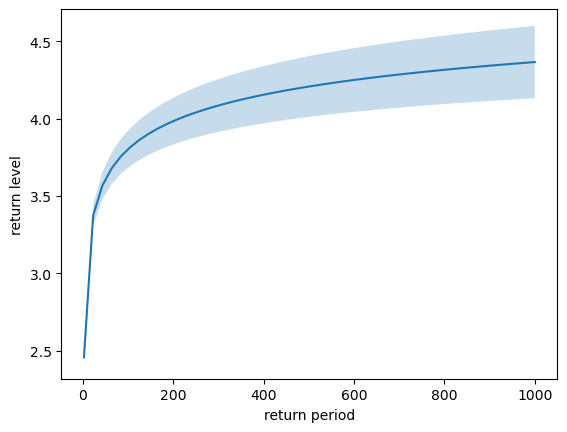

In [17]:
gev.return_level_plot(include_ci=True,log_scale=False)

In [18]:
gpd = GPDMLE(u=2.0)
gpd.fit(x_data)
gpd.get_params(include_ci=True)
gpd.return_level_se(100.0, period=100)

array(0.05825234)

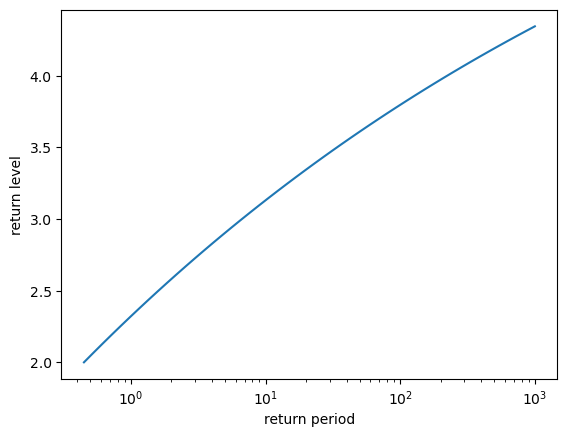

In [19]:
gpd.return_level_plot(period=100)

In [20]:
gpd.return_level(10.0, period=100)

3.129932327833523

In [21]:
gev.return_level(10)

3.113643250587379